# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [4]:
counts=results['actual'].value_counts()
counts

1.0    3000
0.0    2000
Name: actual, dtype: int64

<BarContainer object of 2 artists>

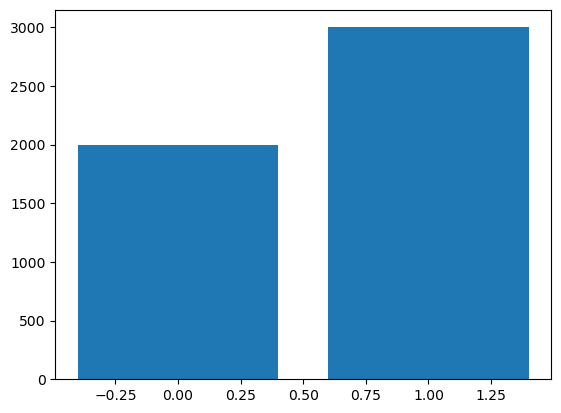

In [11]:
plt.bar(counts.index, counts.values)

* The Distribution is imbalancing, I am concerned about the bias.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

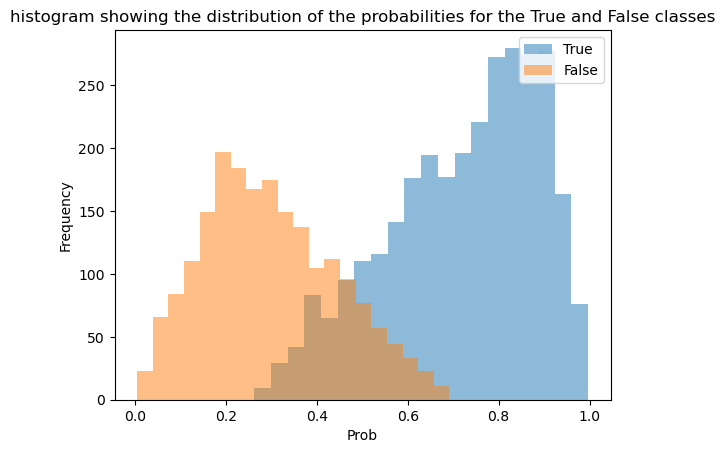

In [16]:
true_prob = results[results['actual'] == 1]['prob']
false_prob = results[results['actual'] == 0]['prob']

plt.hist(true_prob, bins=20, alpha=0.5, label='True')
plt.hist(false_prob, bins=20, alpha=0.5, label='False')
plt.title('histogram showing the distribution of the probabilities for the True and False classes')
plt.legend(loc='upper right')
plt.xlabel('Prob')
plt.ylabel('Frequency')
plt.show()

* There are some differences in the shape and height of the histogram bars for the true and false classes.
* We can observe a higher and narrower peak for the true class, and a lower and wider peak for the false class, hence the model tends to overestimate the probabilities for the true class

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [19]:
from sklearn.metrics import confusion_matrix
results['threshold'] = (results['prob'] >= 0.5).astype(int)
conmat = confusion_matrix(results['actual'], results['threshold'])
print(conmat)

[[1790  210]
 [ 377 2623]]


In [28]:
conmat_df = pd.DataFrame(conmat, index=['Actual_Pos', 'Actual_Neg' ], columns=['Prob_Pos','Prob_Neg'])
conmat_df

,Prob_Pos,Prob_Neg
Actual_Pos,1790,210
Actual_Neg,377,2623


* I can observe that there are 1790 True Positives, 2623 True Negatives, 210 False positives and 377 False Negatives

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

##### Accuracy

In [30]:
TP= 1790
TN= 2623
FP= 210
FN= 377

def accuracy(m):
    return ((TP + TN) / (TP + TN + FP + FN))

conmat_Acc = accuracy(conmat_df)

print(f'Accuracy: {conmat_Acc:.2%}')

Accuracy: 88.26%


##### Precision and Recall

In [31]:
def precision(m):
    return (TP / (TP + FP))

def recall(m):
    return (TP / (TP + FN)) 

conmat_Prescision = precision(conmat_df)
conmat_Recall = recall(conmat_df)

print(f'Precision: {conmat_Prescision:.2%}')
print(f'Recall: {conmat_Recall:.2%}')


Precision: 89.50%
Recall: 82.60%


Insert comments here

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [33]:
results.columns

Index(['actual', 'prob', 'threshold'], dtype='object')

In [34]:
X = results['threshold']
y = results['actual']

In [38]:
from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

X_train, X_test, y_train, y_test = create_splits(X, y)
print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 4,000
Test sample: 1,000


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(x, y, comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=comp)),
         ('model', LogisticRegression(penalty=None))
        ]
    )

    return modeling_pipeline.fit(x, y)

m = generate_estimates(X_train, y_train)
m

AttributeError: 'Series' object has no attribute 'reshape'

Insert comments here